# ADABOOST AND GRADIENT BOOST FOR CHURN DATA SET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score, roc_curve, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv("new_churn_data.csv")
data.head(10)

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
5,3120,1,32.0,R,5,3,111,5,0,227,...,Bi-Weekly,0,0,0,0,Taurus,0,0,1.83,0
6,41406,0,21.0,na,0,0,4,0,0,0,...,Bi-Weekly,0,0,0,0,Cancer,0,0,0.07,0
7,67679,0,24.0,na,0,0,2,0,0,0,...,na,0,0,0,0,Leo,0,0,0.11,0
8,21269,0,28.0,R,0,0,0,0,2,47,...,Bi-Weekly,0,0,0,0,Sagittarius,0,0,0.87,1
9,25788,0,23.0,na,1,0,87,1,0,125,...,Bi-Weekly,0,0,0,0,Aquarius,0,0,1.07,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26996 entries, 0 to 26995
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     26996 non-null  int64  
 1   churn                    26996 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  26996 non-null  object 
 4   deposits                 26996 non-null  int64  
 5   withdrawal               26996 non-null  int64  
 6   purchases_partners       26996 non-null  int64  
 7   purchases                26996 non-null  int64  
 8   cc_taken                 26996 non-null  int64  
 9   cc_recommended           26996 non-null  int64  
 10  cc_disliked              26996 non-null  int64  
 11  cc_liked                 26996 non-null  int64  
 12  cc_application_begin     26996 non-null  int64  
 13  app_downloaded           26996 non-null  int64  
 14  web_user              

In [4]:
data.corr()

,user,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
user,1.000000,0.068663,-0.022443,-0.182143,-0.111446,-0.296324,-0.182230,-0.078437,-0.522829,-0.036996,...,-0.097284,-0.097917,0.015280,0.006195,-0.031182,0.025537,-0.026121,-0.029136,-0.489710,-0.164485
churn,0.068663,1.000000,-0.063206,-0.135381,-0.068543,-0.260784,-0.135921,0.058383,-0.198570,0.009423,...,-0.036626,0.028578,-0.013558,0.035275,0.049960,0.056457,0.005094,0.036134,-0.167193,-0.083241
age,-0.022443,-0.063206,1.000000,0.088757,0.044177,-0.000943,0.088769,0.077199,0.095860,0.005577,...,-0.210068,-0.001354,0.004164,-0.003713,-0.001808,0.011030,-0.022500,0.034534,0.086167,-0.001557
deposits,-0.182143,-0.135381,0.088757,1.000000,0.488902,0.326588,0.998554,-0.047058,0.376123,-0.014680,...,-0.002171,0.040044,-0.002928,0.011381,-0.009439,-0.018501,0.048370,-0.011354,0.267635,0.229957
withdrawal,-0.111446,-0.068543,0.044177,0.488902,1.000000,0.223692,0.488285,-0.040658,0.187423,-0.011105,...,-0.004248,0.047112,0.003173,-0.002577,-0.006240,-0.009826,0.032079,-0.009968,0.125363,0.211614
purchases_partners,-0.296324,-0.260784,-0.000943,0.326588,0.223692,1.000000,0.326529,-0.101511,0.594491,-0.035335,...,0.048343,0.072166,0.000089,0.014012,-0.015040,-0.030989,0.082333,-0.032074,0.432839,0.301542
purchases,-0.182230,-0.135921,0.088769,0.998554,0.488285,0.326529,1.000000,-0.047082,0.376666,-0.014583,...,-0.001371,0.039667,-0.002712,0.011687,-0.009273,-0.018337,0.048654,-0.011511,0.268124,0.230099
cc_taken,-0.078437,0.058383,0.077199,-0.047058,-0.040658,-0.101511,-0.047082,1.000000,0.115100,0.182655,...,-0.044865,0.042719,-0.006079,0.004685,0.046760,0.006387,-0.016006,0.085823,0.149156,-0.025004
cc_recommended,-0.522829,-0.198570,0.095860,0.376123,0.187423,0.594491,0.376666,0.115100,1.000000,0.048076,...,0.093413,0.125966,-0.018087,0.014188,0.044977,-0.037966,0.045625,0.037735,0.877549,0.241626
cc_disliked,-0.036996,0.009423,0.005577,-0.014680,-0.011105,-0.035335,-0.014583,0.182655,0.048076,1.000000,...,0.005893,0.025728,-0.002094,0.011349,0.014676,-0.002854,-0.012925,0.033594,0.060708,-0.009285


In [5]:
data.isnull().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [6]:
data.drop(["zodiac_sign"], axis=1, inplace=True)
data.drop(["user"], axis=1, inplace=True)

In [7]:
data["payment_type"].unique()

array(['Bi-Weekly', 'Weekly', 'Semi-Monthly', 'na', 'Monthly'],
      dtype=object)

In [8]:
data["housing"].unique()

array(['na', 'R', 'O'], dtype=object)

In [9]:
data["payment_type"] = data["payment_type"].astype("category")
data["housing"] = data["housing"].astype("category")

In [10]:
data["payment_type"] = data["payment_type"].cat.codes
data["housing"] = data["housing"].cat.codes

In [11]:
data.head(10)

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.00,0
1,0,28.0,1,0,0,1,0,0,96,0,...,0,3,0,0,0,0,0,0,1.47,1
2,0,35.0,1,47,2,86,47,0,285,0,...,2,2,0,0,0,0,1,0,2.17,0
3,0,26.0,1,26,3,38,25,0,74,0,...,0,0,0,0,0,0,0,0,1.10,1
4,1,27.0,2,0,0,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0.03,0
5,1,32.0,1,5,3,111,5,0,227,0,...,0,0,0,0,0,0,0,0,1.83,0
6,0,21.0,2,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0.07,0
7,0,24.0,2,0,0,2,0,0,0,0,...,0,4,0,0,0,0,0,0,0.11,0
8,0,28.0,1,0,0,0,0,2,47,1,...,0,0,0,0,0,0,0,0,0.87,1
9,0,23.0,2,1,0,87,1,0,125,0,...,0,0,0,0,0,0,0,0,1.07,0


In [12]:
y = data.iloc[:,0].values
y

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [13]:
x = data.iloc[:, 1:-1]

In [14]:
sc = StandardScaler()
x= sc.fit_transform(x)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=0)

In [17]:
data.groupby(["churn"]).count()

,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
churn,,,,,,,,,,,,,,,,,,,,,
0,15822,15822,15822,15822,15822,15822,15822,15822,15822,15822,...,15822,15822,15822,15822,15822,15822,15822,15822,15822,15822
1,11174,11174,11174,11174,11174,11174,11174,11174,11174,11174,...,11174,11174,11174,11174,11174,11174,11174,11174,11174,11174


# CROSS VALIDATION

In [18]:
knn = KNeighborsClassifier(n_neighbors=5)

In [19]:
score = cross_val_score(knn, x, y, cv= 10, scoring="accuracy")

In [20]:
score

array([0.64555556, 0.65481481, 0.63962963, 0.64074074, 0.63222222,
       0.64851852, 0.6294924 , 0.63171545, 0.64505372, 0.64468322])

In [21]:
score.mean()

0.6412426275849766

In [22]:
#Since the score is very low we need to try Hyperparameter tuining to obtain the optimal value here.

# GRADIENT BOOST CLASSIFIER

In [23]:
GBC = GradientBoostingClassifier()

In [24]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [25]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [26]:
GBC_predict = GBC.predict(x_test)

In [27]:
confusion_matrix(y_test, GBC_predict)

array([[2566,  600],
       [1018, 1216]], dtype=int64)

In [28]:
precision_score(y_test, GBC_predict)

0.6696035242290749

In [29]:
GBC.score(x_test, y_test)

0.7003703703703704

In [30]:
y_pred_prob = GBC.predict_proba(x_test)[:,1]
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

Text(0, 0.5, 'True Positive Rate')

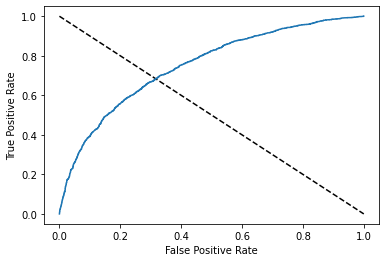

In [31]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = "GradientBoostingClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# ADABOOST CLASSIFIER

In [32]:
adaboost = AdaBoostClassifier()

In [33]:
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [34]:
ADB_predict = adaboost.predict(x_test)

In [35]:
adaboost.score(x_test, y_test)

0.6716666666666666

In [36]:
confusion_matrix(y_test, ADB_predict)

array([[2484,  682],
       [1091, 1143]], dtype=int64)

In [37]:
ADB_pred_prob = adaboost.predict_proba(x_test)[:,1]
fpr, tpr, thresholds= roc_curve(y_test, ADB_pred_prob)

Text(0, 0.5, 'True Positive Rate')

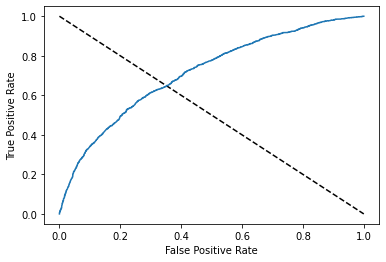

In [38]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = "AdaBoostClassifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')